## Bar Plots 

### Step 9: Creating a Bar Plot and calculating the mean price distribution

In [1]:
# Import necessary libraries 
import pandas as pd
import numpy as np
import seaborn as sb

In [2]:
# Import the diamonds dataset in seaborn
diamonds_df = sb.load_dataset('diamonds')

In [3]:
diamonds_df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


- Bar Plots usually display the counts of categorical variables.
- These majorly depicts the relationship between categorical and numerical variable.
- We need to separate the uniqur values of cut and clarity and then use it to display.

In [4]:
# Using .unique() we get the distinct categories of that specific column
diamonds_df.cut.unique()

['Ideal', 'Premium', 'Good', 'Very Good', 'Fair']
Categories (5, object): ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']

In [5]:
# Do the same for clarity
diamonds_df.clarity.unique()

['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF']
Categories (8, object): ['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1']

In [6]:
# If you want to get the number of unique values then use .nunique()
diamonds_df.cut.nunique()

5

In [7]:
diamonds_df.clarity.nunique()

8

- Now we have figured out the unique categories in cut and clarity. We need to count how many are there in each category.

In [9]:
# We will be using .crosstab() for creating a table
cut_count_table = pd.crosstab(index = diamonds_df['cut'],columns='count')
cut_count_table

col_0,count
cut,
Ideal,21551
Premium,13791
Very Good,12082
Good,4906
Fair,1610


<AxesSubplot:xlabel='cut'>

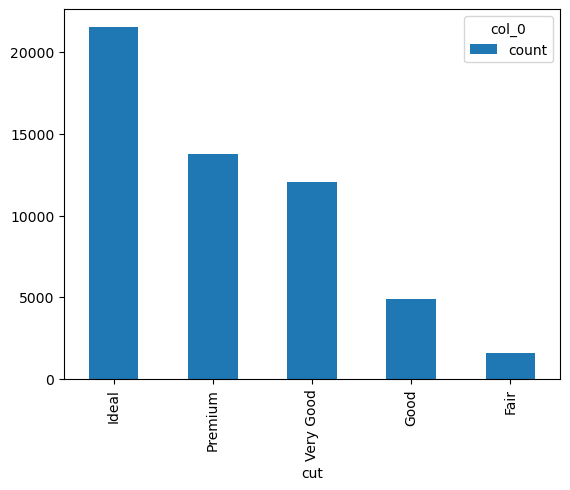

In [10]:
# We need to do a bar plot so with pandas function we can do it by
cut_count_table.plot(kind='bar')

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


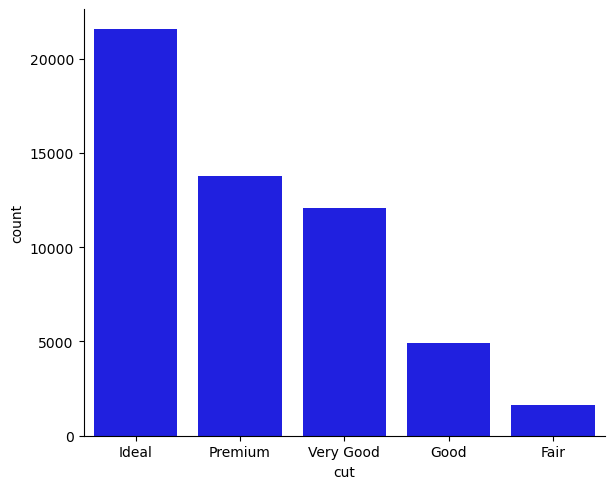

In [15]:
# If we have to do the same in seaborn then we can do it by:
sb.catplot("cut",data=diamonds_df,aspect=1.25,kind='count',color="blue")

- Now we need to get mean price distribution of different cut qualities using seaborn.

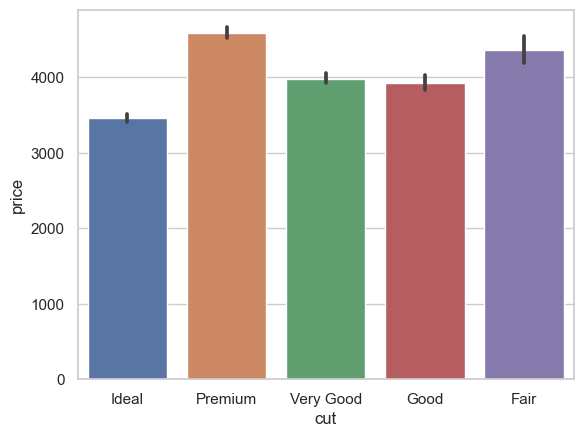

In [16]:
import seaborn as sb
from numpy import median, mean

sb.set(style="whitegrid")

ax = sb.barplot(x="cut",y="price",data=diamonds_df,estimator=mean)

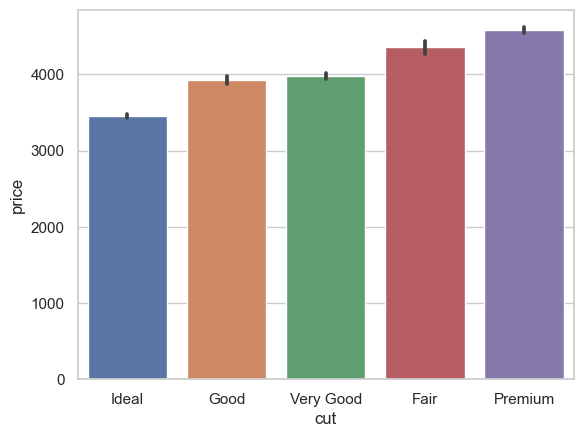

In [21]:
# By default the standard deviation is 95%, to set it to 68% we can do it by:
ax = sb.barplot(x="cut",y="price",data=diamonds_df,estimator=mean,ci=68,order=['Ideal','Good','Very Good','Fair','Premium'])

### Step 10: Creating bar plots grouped by specific feature

- In each cut quality category there are different types of color diamonds available and to view the price variation in each color we can do it by

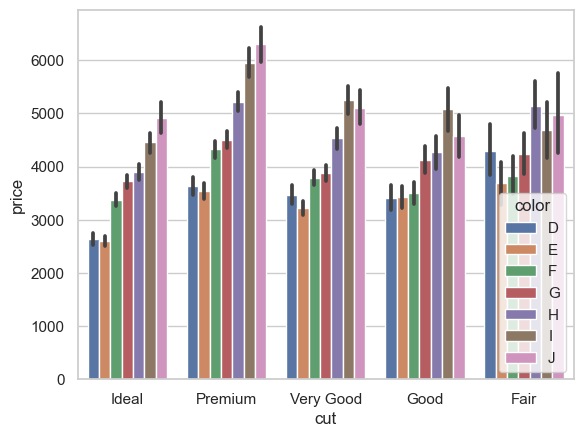

In [24]:
ax2 = sb.barplot(x="cut",y="price",hue="color",data=diamonds_df)

- The legend is not properly placed in the bar plot, so to adjust that and then tweak it, there is a possibility.

###  Step 11: Tweaking the plot parameters of grouped bar plot

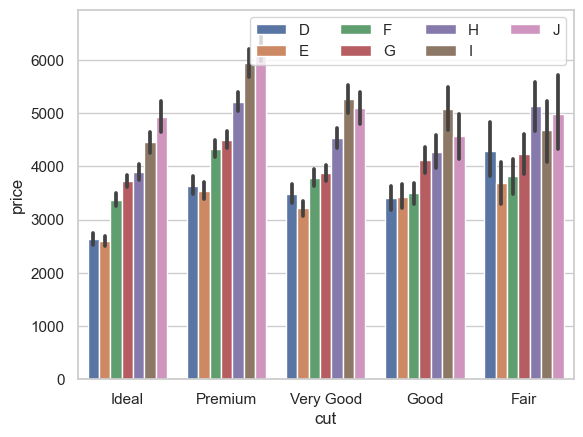

In [32]:
ax =sb.barplot(x="cut",y="price",hue="color",data=diamonds_df)
ax.legend(loc='upper right',ncol=4)

Text(0, 0.5, 'Price')

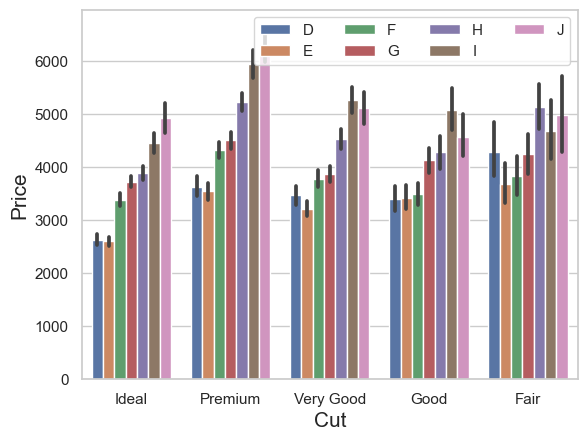

In [40]:
# To modify the axis labels on x-axis and y-axis we can do it by
ax = sb.barplot(x="cut",y="price",hue="color",data=diamonds_df)
ax.legend(loc="upper right", ncol=4)
ax.set_xlabel('Cut',fontdict={'fontsize':15})
ax.set_ylabel('Price',fontdict={'fontsize':15})

[Text(0, 0, 'Ideal'),
 Text(1, 0, 'Premium'),
 Text(2, 0, 'Very Good'),
 Text(3, 0, 'Good'),
 Text(4, 0, 'Fair')]

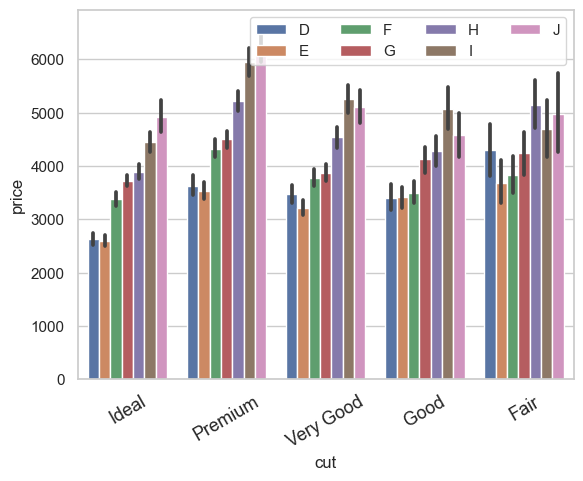

In [44]:
# To rotate the x-axis labels and alter its font size we can do it by:
ax = sb.barplot(x="cut",y="price",hue="color",data=diamonds_df)
ax.legend(loc="upper right", ncol=4)
ax.set_xticklabels(ax.get_xticklabels(),fontsize=13,rotation=30)

### Adding annotations to bar plot

- Annotation is a piece of information that gives more clarity of what we are looking at, let's say we want to give more information about the type of diamond we can use annotation. 

In [45]:
# Import the necessary modules
import matplotlib.pyplot as plt
import seaborn as sb

In [46]:
# Loading the dataset using seaborn
diamonds_df = sb.load_dataset('diamonds')

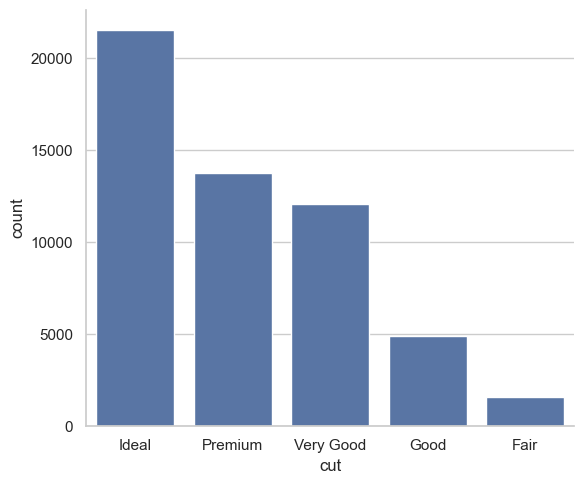

In [49]:
# Generating a catplot using seaborn function
ax = sb.catplot(x="cut",data=diamonds_df,aspect=1.2,kind="count",color="b")

In [50]:
# We have generated the plot now we need to annotate an ideal column, to do that we need to get records from dataframe corresponding to ideal category
# We can select that specific data using loc function
ideal_group = diamonds_df.loc[diamonds_df['cut']=='Ideal']

In [51]:
# We have selected the dataset and now we need to decide where the annotation has to be placed
x = ideal_group.index.tolist()[0]

In [52]:
# Get the location of y coordinate where the annotation has to be placed
y = len(ideal_group)

In [53]:
print(x,y)

0 21551


Text(0.3, 23551, 'excellent polish and symmetry ratings;\nreflects almost all the lights that enters it')

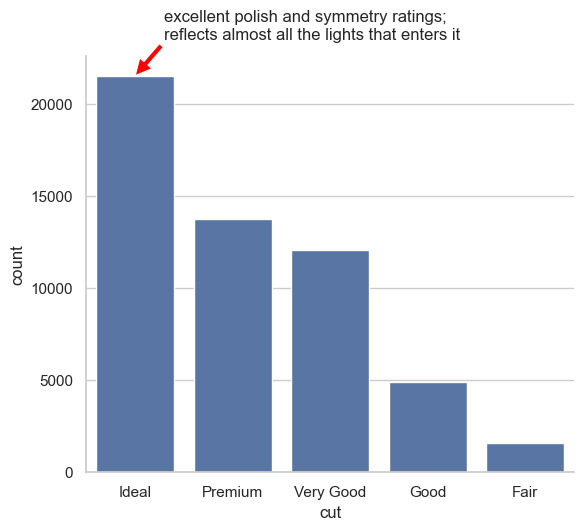

In [60]:
# Now it's time to print the message
sb.catplot(x="cut",kind="count",data=diamonds_df,aspect=1.2,color="b")
plt.annotate('excellent polish and symmetry ratings;\nreflects almost all the lights that enters it',xy=(x,y),xytext=(x+0.3,y+2000),arrowprops=dict(facecolor='red'))

- Let's decode the above piece of code
- We are trying to plot a barplot using **pandas** so we use **plot(kind='bar')** and **catplot(kind='count)**.
- We define the x axis that is **cut**.
- We define the y axis using kind that is **count**.
- Using **x** and **y** coordinates we define the offset value for the text.
- Using arrowprops we use to define the color.